In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
raw = pd.read_csv('insurance_fraud_detect_data.csv')
raw.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0


In [112]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          16000 non-null  int64  
 14  repair_cost            16000 non-null  float64
 15  in

In [90]:
raw.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt', 'test_set'],
      dtype='object')

In [91]:
raw['fraud_YN'].value_counts()

0    15959
1       41
Name: fraud_YN, dtype: int64

In [92]:
frauds_rate = raw['fraud_YN'].value_counts()[1]/len(raw)*100
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.25625000000000003 % of the dataset


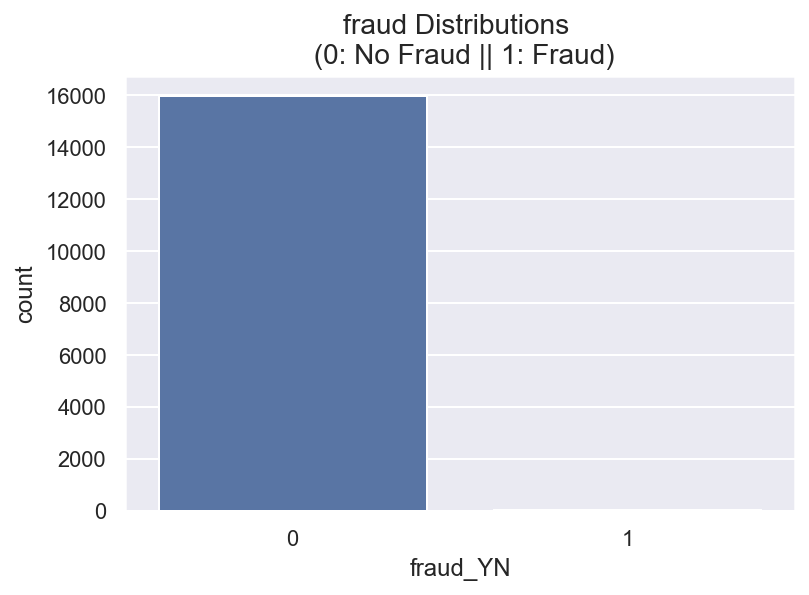

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fraud_YN', data=raw)
plt.title('fraud Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [94]:
len(raw[raw['fraud_YN'] == 1])

41

In [95]:
X = raw.iloc[:, 1:]
y = raw.iloc[:, 0]

X.shape, y.shape

((16000, 24), (16000,))

In [96]:
X.tail()

,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
15995,2,0,2,0,2,0,100,2,0,0,...,0,1,1,0,1,0,0,0,-1,0
15996,2,0,2,1,4,0,100,1,1,0,...,0,2,1,0,1,0,0,0,-1,0
15997,2,1,2,0,4,0,100,1,0,0,...,0,0,0,0,1,0,0,0,-1,1
15998,2,0,2,0,2,0,100,2,0,0,...,0,4,1,0,1,0,0,0,-1,0
15999,2,0,2,0,1,0,100,1,0,0,...,1188750,2,0,0,1,0,0,0,-1,0


In [116]:
train_df = raw[raw['test_set'] == 0]
test_df = raw[raw['test_set'] == 1]
train_df = train_df.drop(columns=['test_set'])
test_df = test_df.drop(columns=['test_set'])

X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12879, 23), (12879,), (3121, 23), (3121,))

In [117]:
y_test.value_counts()

0    3114
1       7
Name: fraud_YN, dtype: int64

In [118]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train)*100

0.26399565183632273

In [119]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([3114,    7]))

In [120]:
tmp = np.unique(y_test, return_counts=True)[1]
tmp[1]/len(y_test)*100

0.2242870874719641

- train 데이터의 불균형 정도는 유지되고 있고, test data는 데이터 불균형이 약간 더 심한 상태

### 1st Trial 

### 분류기 성능 return 함수 생성 

In [121]:
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [122]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('====================')
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

### 분류모델 
- 1. Logistic Regression
- 2. Decision Tree
- 3. Random Forest
- 4. LightGBM

In [123]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy: 0.9978, Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC: 0.5000


/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy: 0.9978, Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC: 0.5000


/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy: 0.9978, Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC: 0.5000


/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=1,
                         boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred= lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy: 0.9978, Precision: 0.0000
Recall: 0.0000, F1: 0.0000, AUC: 0.5000


/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## *recall 과 precision 의 의미 다시한번 재정비하고 가기*

In [127]:
# 모델과 데이터를 주면 성능을 출력하는 함수 
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [128]:
def get_result_pd(models, model_names, X_tain, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp =[]
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [129]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit time:  2.165734052658081


/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.997757,0.0,0.0,0.0,0.5
DecisionTree,0.997757,0.0,0.0,0.0,0.5
RandomForest,0.997757,0.0,0.0,0.0,0.5
LightGBM,0.997757,0.0,0.0,0.0,0.5


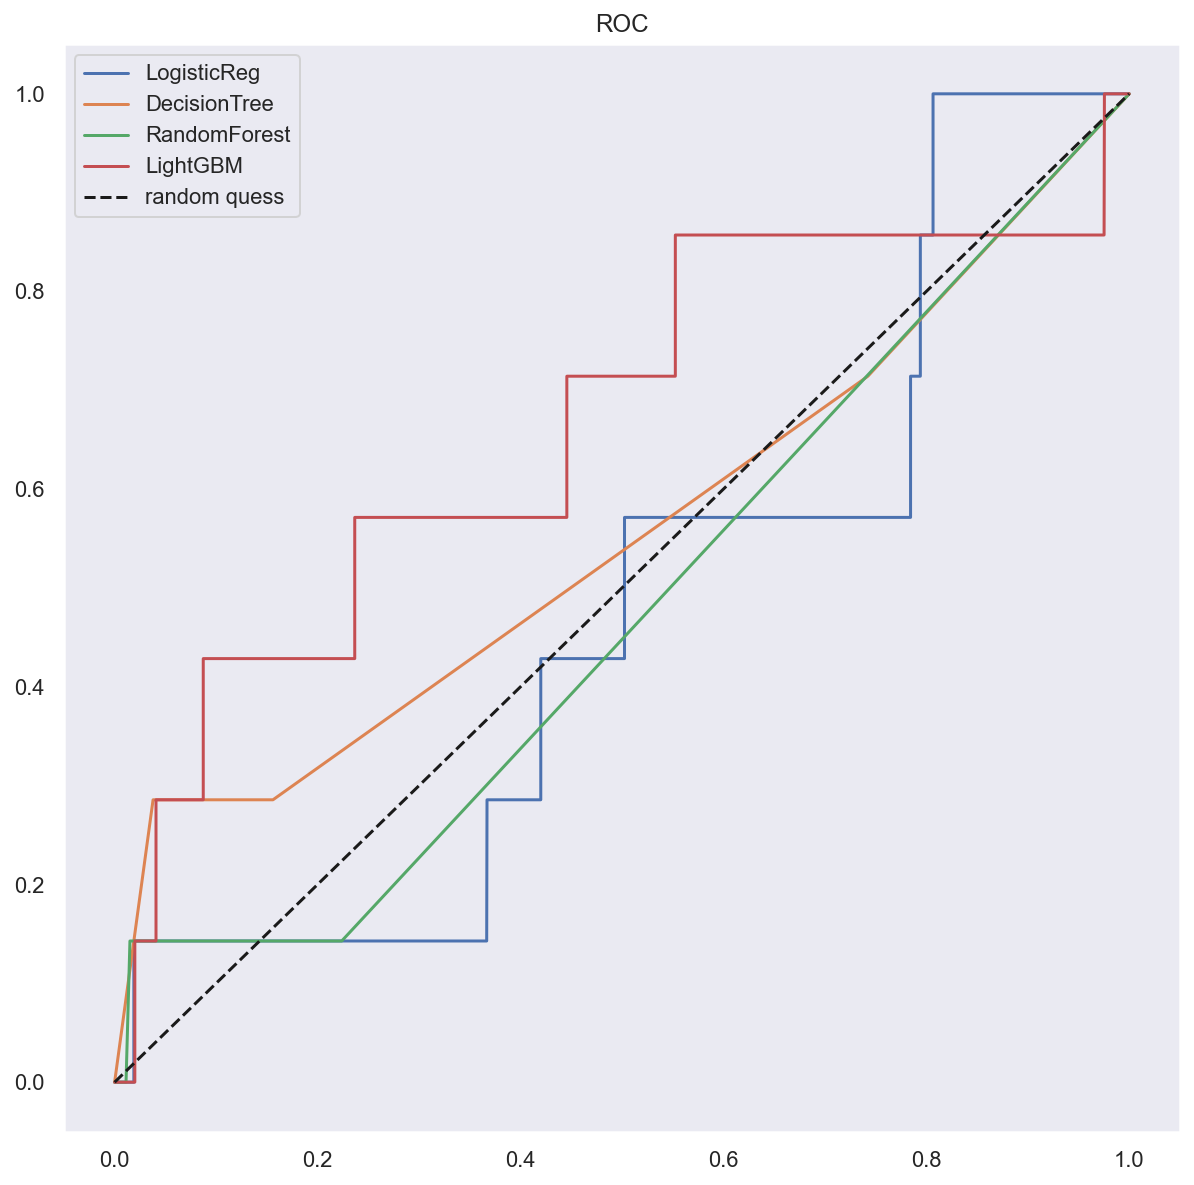

In [130]:
from sklearn.metrics import roc_curve

def draw_roc_curve(model, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label = model_names[model])
        
    plt.plot([0,1], [0,1], 'k--', label = 'random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)   

/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


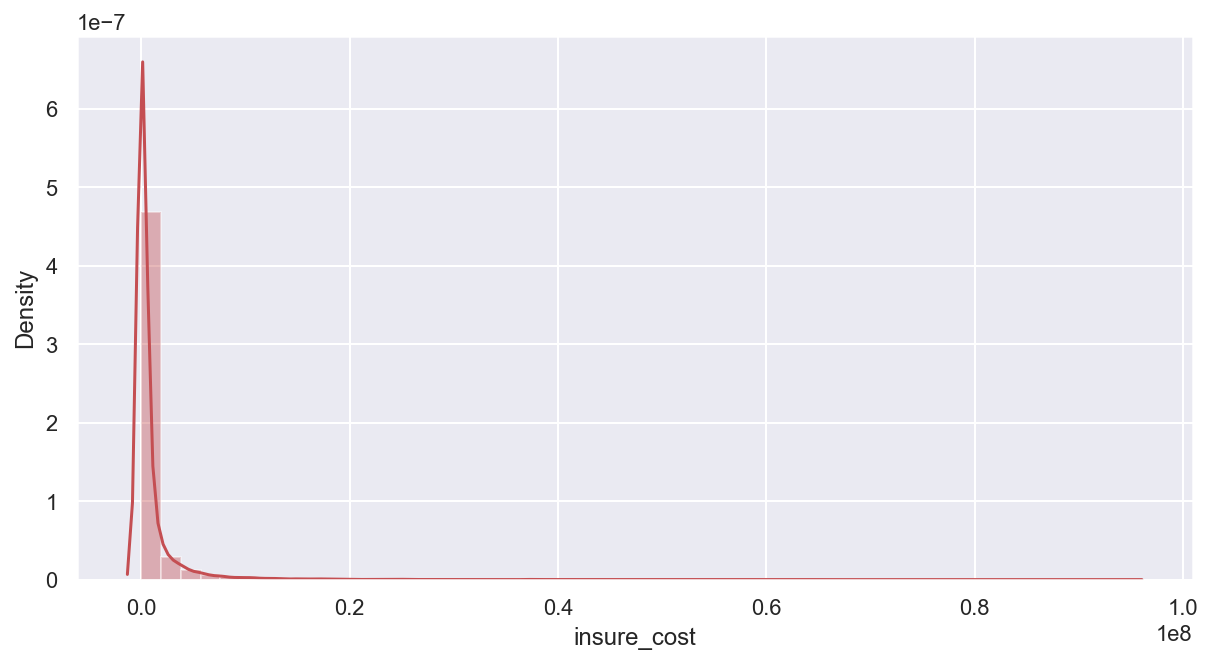

In [131]:
### insure_cost 가 영향을 끼치지 않을까..?
plt.figure(figsize=(10,5))
sns.distplot(raw['insure_cost'], color='r')

plt.show()

In [132]:
# train_set만 가지고 예측해보기

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cost_n = scaler.fit_transform(train_df['insure_cost'].values.reshape(-1,1))

raw_data_copy = train_df.copy()
raw_data_copy['scaled_insure_cost'] = cost_n
raw_data_copy = raw_data_copy.drop(columns=['insure_cost'], axis=1)
raw_data_copy.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,repair_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,scaled_insure_cost
0,0,2,1,3,0,2,0,100,2,0,...,1.302547e+05,1,0,0,1,0,0,0,-1,-0.273447
3,0,3,1,3,0,4,0,0,2,0,...,1.341009e+06,3,1,0,1,0,0,0,-1,-0.273447
4,0,1,0,1,0,1,0,100,1,0,...,5.240306e+05,1,0,0,2,0,0,0,-1,0.121310
6,1,1,1,3,0,4,0,100,3,0,...,0.000000e+00,0,0,0,1,1,2,1,2,0.123879
8,0,2,0,4,0,4,0,0,1,0,...,0.000000e+00,1,0,0,1,1,1,1,2,-0.273447


In [136]:
X = raw_data_copy.iloc[:,1:]
y = raw_data_copy.iloc[:,0]

X.shape, y.shape

((12879, 23), (12879,))

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.3, 
                random_state=13, stratify = y)

In [138]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit time:  1.6506059169769287


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.997412,0.0,0.0,0.0,0.50000
DecisionTree,0.997412,0.0,0.0,0.0,0.50000
RandomForest,0.997412,0.0,0.0,0.0,0.50000
LightGBM,0.997153,0.0,0.0,0.0,0.49987


In [140]:
raw = pd.read_csv('./insurance_fraud_detect_data.csv')

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cost_n = scaler.fit_transform(raw['insure_cost'].values.reshape(-1,1))

raw_data_copy = raw.copy()
raw_data_copy['scaled_insure_cost'] = cost_n
raw_data_copy = raw_data_copy.drop(columns=['insure_cost'], axis=1)
raw_data_copy.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set,scaled_insure_cost
0,0,2,1,3,0,2,0,100,2,0,...,1,0,0,1,0,0,0,-1,0,-0.277737
1,0,1,0,4,0,4,0,0,3,1,...,1,1,1,2,1,1,1,0,1,-0.277737
2,0,1,0,4,1,4,0,100,3,1,...,3,1,0,2,1,1,1,0,1,3.899144
3,0,3,1,3,0,4,0,0,2,0,...,3,1,0,1,0,0,0,-1,0,-0.277737
4,0,1,0,1,0,1,0,100,1,0,...,1,0,0,2,0,0,0,-1,0,0.113098


In [142]:
train_df = raw_data_copy[raw_data_copy['test_set'] == 0]
train_df = train_df.drop(columns =['test_set'], axis =1)
test_df = raw_data_copy[raw_data_copy['test_set'] == 1]
test_df = test_df.drop(columns =['test_set'], axis =1)

X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12879, 23), (12879,), (3121, 23), (3121,))

In [143]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit time:  2.130997896194458


/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.997757,0.0,0.0,0.0,0.500000
DecisionTree,0.997116,0.0,0.0,0.0,0.499679
RandomForest,0.997757,0.0,0.0,0.0,0.500000
LightGBM,0.997757,0.0,0.0,0.0,0.500000


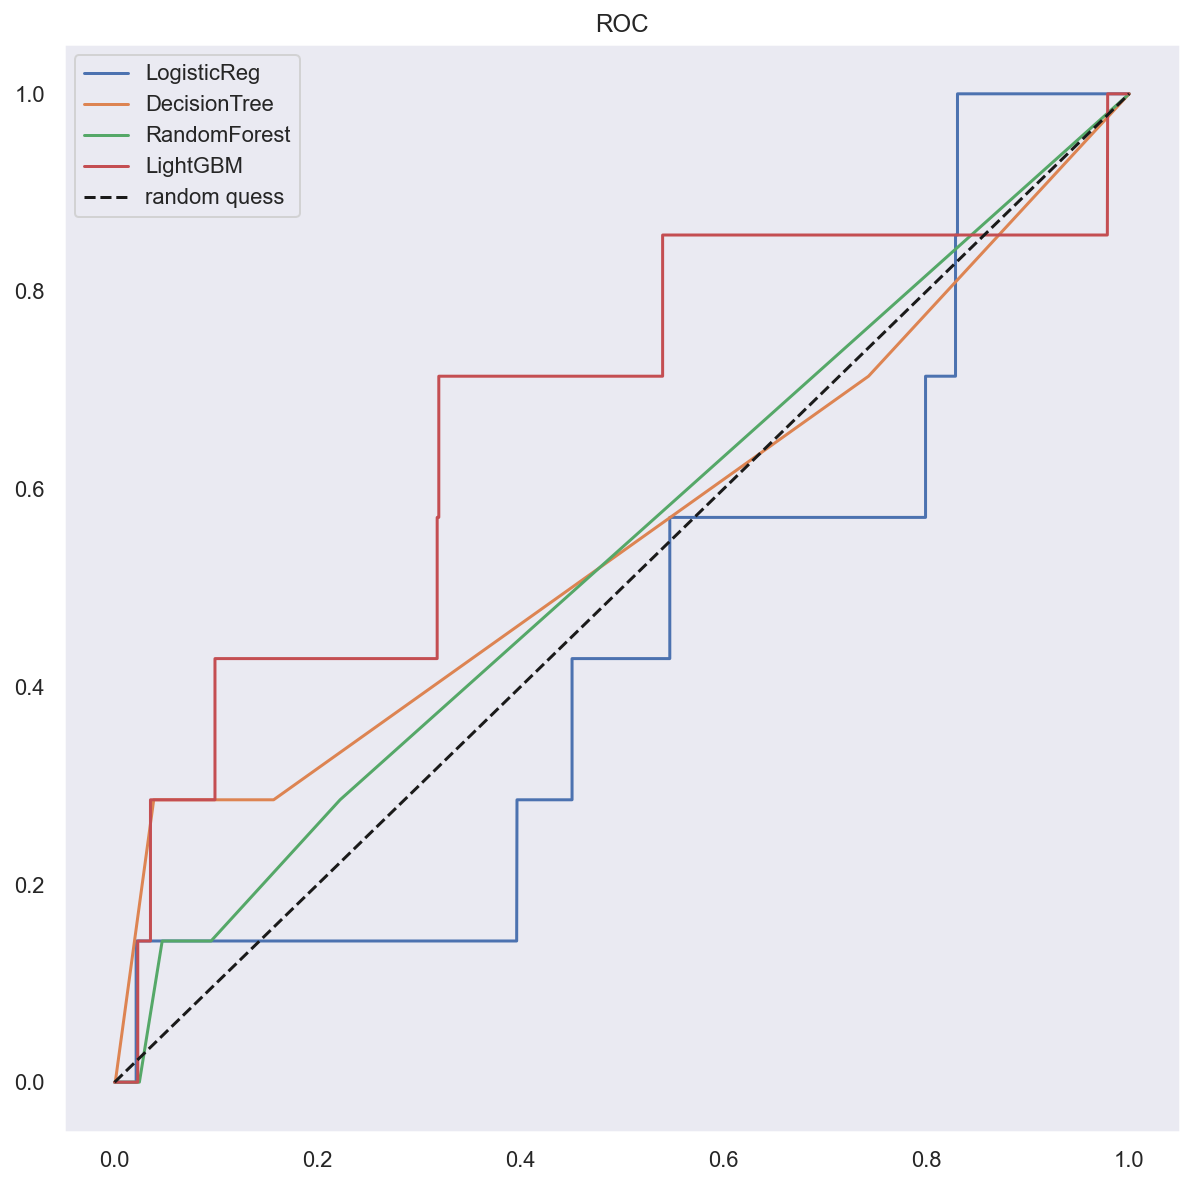

In [144]:
draw_roc_curve(models, model_names, X_test, y_test)